# Investigating why do patients miss their scheduled medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I will be exploring and analyzing a dataset of over 100k medical appointments in Brazil and my aim is to explore the affects of different factors on patients missing their scheduled appointments. For more details you can check the dataset page on Kaggle https://www.kaggle.com/joniarroba/noshowappointments

### Data columns:
* **PatientId**: The identification of a patient 
* **AppointmentID**: The identification of each appointment 
* **Gender**: The gender of the patient Female (F) or Male (M)
* **ScheduledDay**: The day someone called or registered the appointment
* **AppointmentDay**: The day of the actual appointment
* **Age**: The age of the patient
* **Neighbourhood**: The Neighbourhood in which the appointment takes place
* **Scholarship**: True (1) or False (0) and it indicates whether or not the patient is enrolled in Brasilian welfare program
* **Hipertension**: True (1) or False (0) 
* **Diabetes**: True (1) or False (0) 
* **Alcoholism**: True (1) or False (0) 
* **Handcap**: True (1) or False (0) 
* **SMS_received**: True (1) or False (0)
* **No-show**: The status of the appointment, ‘No’ indicates that the patient showed up to their appointment, while ‘Yes’ indicates that they did not show up. 

This project will focus on the no-show as the dependent variable, I will try to investigate if one of the other variables or a combination of them will help us in predicting if a patient will show up for their scheduled appointment or not?

In [1]:
# Project setup and importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I'll load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Loading the data in to a DataFrame from the CSV file and exploring the first few lines
appointments = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Check column types and number of entries
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Check the summary statistics for the DataFrame
appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# Check the number of unique entries for each column
appointments.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

From the above 4 cells it seems it we can infer the following:
* There are 110527 records with no duplicates
* The data doesn't have missing fileds in any of the columns
* The min of the Age column is -1 which is not a valid age, so this will need further investigation. Also 115 seems to be pretty high but it is still possible, a quick google search shows that there are a few verified people of that age
* The max of the Handcap column is 4 which is not a aligned with the true and false options stated in the documentation of the data, it also has 5 different unique values, so this will need further investigation
* The data type for the ScheduledDay and AppointmentDay columns need to be changed to Date/Time data type
* The data types for the rest of the columns are fine
* The AppointmentID column can be dropped as they don't provide any added benefit to the analysis
* The PatientId column will be kept as it is clear from number of unique entries that some patients had more than 1 appointment
* The No-show column will be easier to handle if it is 0 or 1 instead of Yes and No

### Data Cleaning

I'll start by further investigating and cleaning the data to fix the below issues that I identified in the previous section:
1. The AppointmentID column can be dropped as they don't provide any added benefit to the analysis
2. The data type for the ScheduledDay and AppointmentDay columns need to be changed to Date/Time data type
3. The max of the Handcap column is 4 which is not a aligned with the true and false options stated in the documentation of the data, it also has 5 different unique values
4. The min of the Age column is -1 which is not a valid age
5. The No-show column will be easier to handle if it is 0 or 1 instead of Yes and No

In [6]:
# Drop the AppointmentID column
appointments.drop(['AppointmentID'], axis=1, inplace=True)

In [7]:
# Changing the data type for the ScheduledDay and AppointmentDay columns to datetime
# This can also be done while importing with the read_csv function
appointments['ScheduledDay'] = pd.to_datetime(appointments['ScheduledDay'])
appointments['AppointmentDay'] = pd.to_datetime(appointments['AppointmentDay'])
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110527 non-null float64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(7), object(3)
memory usage: 11.0+ MB


In [8]:
# Checking the Handcap column
appointments['Handcap'].unique()

array([0, 1, 2, 3, 4])

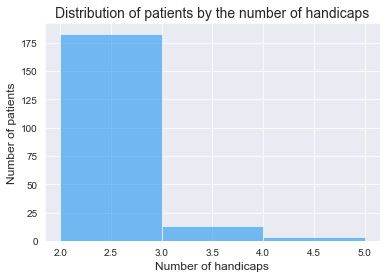

In [9]:
appointments[appointments['Handcap']>1]['Handcap'].plot(kind='hist', bins=[2,3,4,5], color='#2196F3', alpha=.6)
plt.title('Distribution of patients by the number of handicaps', fontsize=14)
plt.xlabel('Number of handicaps', fontsize=12)
plt.ylabel('Number of patients', fontsize=12)
plt.show()

From the above 2 cells it seems that it is not an error or a typo in the data based on the number of records above one and the variation in the values. So I'll assume that this column corresponds to the number of handicaps, not just the presence or absence of it. So no changes will be made to this column.

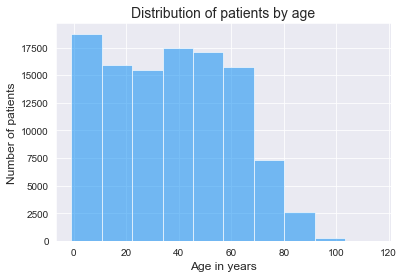

In [10]:
# Investigating the Age column
appointments['Age'].plot(kind='hist', color='#2196F3', alpha=.6)
plt.title('Distribution of patients by age', fontsize=14)
plt.xlabel('Age in years', fontsize=12)
plt.ylabel('Number of patients', fontsize=12)
plt.show()

In [11]:
appointments[appointments['Age']==-1]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
# Removing the faulty row
appointments = appointments[appointments['Age']!=-1]

The age seems to be distributed normally, and since it is only one row with the age of -1 I dropped it.

In [13]:
# Changing the No-show column values to 0s and 1s
appointments['No-show'] = appointments['No-show'].apply(lambda x: 0 if x == 'No' else 1)

So now for the No-show column the 0 stands for showing up and the 1 stands for a no-show. And now the data is ready to be exlopred for analysis.

<a id='eda'></a>
## Exploratory Data Analysis

Now after cleaning the data, in this section I'll start the exploration process. I'll be looking at the different variables and comparing how they affect the no-show (dependent variable). This will be done by computing different statistics and visualizations.

### General correlation between the variables

In [14]:
# Compute pairwise correlation of columns
appointments.corr()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,1.000000,-0.004121,-0.002877,-0.006436,0.001608,0.011014,-0.007915,-0.009742,-0.001456
Age,-0.004121,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327
Scholarship,-0.002877,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134
Hipertension,-0.006436,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704
Diabetes,0.001608,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181
Alcoholism,0.011014,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197
Handcap,-0.007915,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077
SMS_received,-0.009742,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428
No-show,-0.001456,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000


From the above table it is clear that most of the variables don't have effects on the No-show as their is nearly no correlation between any of them. The highest correlation is with the SMS_received which we will explore below.

In [15]:
def get_proportions(df, indpendent_var, dependent_var, ivy, ivn, dvy, dvn):
    """ This function takes a DataFrame and 2 binomial variables and returns the proportions of all possibilities.
    This can be used to check the effects of the independent variables on the dependent variable"""
    yes = df[df[indpendent_var]>=ivy]
    no = df[df[indpendent_var]==ivn]
    prop_yes_yes = len(yes[yes[dependent_var]==dvy])/len(yes)
    prop_yes_no = len(yes[yes[dependent_var]==dvn])/len(yes)
    prop_no_yes = len(no[no[dependent_var]==dvy])/len(no)
    prop_no_no = len(no[no[dependent_var]==dvn])/len(no)
    
    return [prop_yes_yes, prop_yes_no, prop_no_yes, prop_no_no]

def bar_chart_proportions(df, indpendent_var, dependent_var, ivy=1, ivn=0, dvy=1, dvn=0):
    """Plot a bar chart showing the proportions by the independent variable on the dependent variable."""
    proportions = get_proportions(df, indpendent_var, dependent_var, ivy, ivn, dvy, dvn)
    ind = np.arange(int(len(proportions)/2))
    width = 0.45
    size = 12
    plt.figure(figsize=(size*0.75,size/2))
    plt.bar(ind, [proportions[0],proportions[2]], width, color='#673AB7', alpha=.6, label=dependent_var)
    plt.bar(ind + width, [proportions[1],proportions[3]], width, color='#2196F3', alpha=.6, label="Not "+dependent_var)
    plt.ylabel('Proportion', fontsize=size)
    plt.xlabel(indpendent_var, fontsize=size)
    plt.title('Proportion by {0} for {1}'.format(indpendent_var, dependent_var), fontsize=size*1.25)
    locations = ind + (width / 2)
    if ivy == 1 and ivn == 0:
        labels = ['Yes', 'No']
    else:
        labels = [ivy, ivn]
    plt.xticks(locations, labels, fontsize=size*0.9)
    plt.yticks(fontsize=size*0.9)
    plt.legend(fontsize=size)
    plt.show()


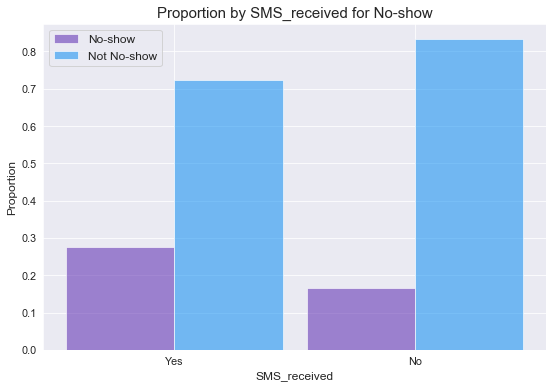

In [16]:
# Exploring the SMS_received affects on the No-show
bar_chart_proportions(appointments, 'SMS_received', 'No-show')

It is the opposite of what you would expect, the patients who received an SMS had a higher chance of not showing up. This might be due to chance, but it would be good to further explore this. To do that it will require further data on the timing of the SMS and also exploring the type of users that are sent an SMS.

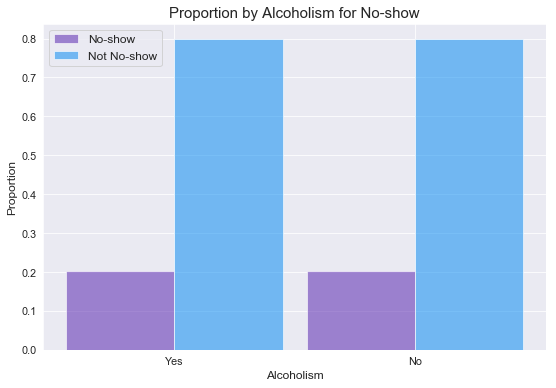

In [17]:
# Exploring the Alcoholism affects on the No-show
bar_chart_proportions(appointments, 'Alcoholism', 'No-show')

As you can see from the above bar chart there is nearly no difference between Alcoholism or not on the no show, the results will be similar for the rest of the variables in the table above with minor differences.

So to move forward I'll explore the following variables on the no-show rate:
1. Genders
2. Neighbourhoods
3. Number of visits
4. Difference between scheduled and appointment dates

### 1. Genders

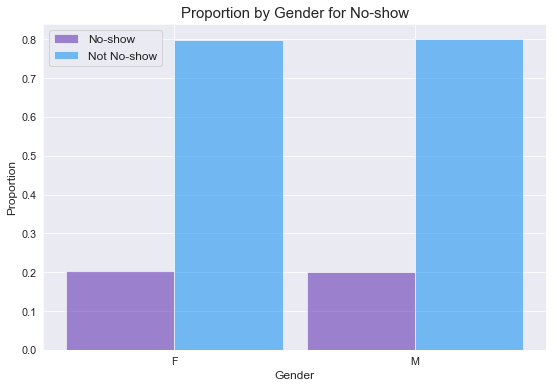

In [18]:
# Exploring the effects of Gender on the no-show
bar_chart_proportions(appointments, 'Gender', 'No-show', 'F', 'M')

It seems that there is also no relation between the gender and the no-show rate.

### 2. Neighbourhoods

In [19]:
# Grouping the data by neighbourhood
neighbourhoods = appointments.groupby('Neighbourhood')
# Counting the number of appointments for each neighbourhood
neighbourhoods_num_app = appointments.groupby('Neighbourhood')['No-show'].count()
# Counting the number of no-show appointments for each neighbourhood
neighbourhoods_num_no_show = appointments.groupby('Neighbourhood')['No-show'].sum()
# Calculating the percentage of no-show appointments for each neighbourhood
neighbourhoods_per_no_show = neighbourhoods_num_no_show/neighbourhoods_num_app

neighbourhoods_num_no_show.describe()

count      81.000000
mean      275.543210
std       277.991504
min         0.000000
25%        69.000000
50%       179.000000
75%       428.000000
max      1465.000000
Name: No-show, dtype: float64

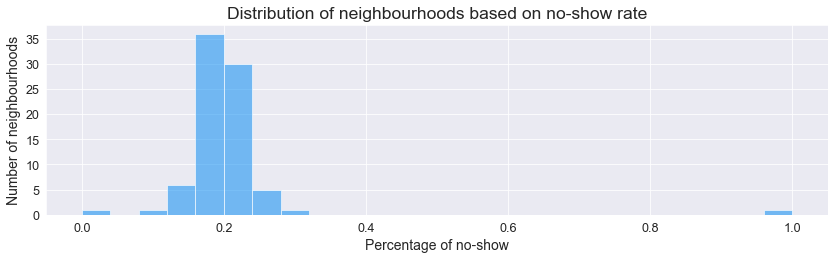

In [20]:
# Plotting the distribution of percentages of no-shows for a single neibourhood
size = 14
plt.figure(figsize=(size,size/4))
plt.hist(neighbourhoods_per_no_show, bins=25, color='#2196F3', alpha=.6)
plt.ylabel('Number of neighbourhoods', fontsize=size)
plt.xlabel('Percentage of no-show', fontsize=size)
plt.title('Distribution of neighbourhoods based on no-show rate', fontsize=size*1.25)
plt.xticks(fontsize=size*0.9)
plt.yticks(fontsize=size*0.9)
plt.show()

From the summary statistics it is clear that there is a big variation between the neighbourhoods and with the range of 1465 no-show appointments and a standard deviation of 278. But the histogram shows that most of the neighbourhoods have a percentage of no-show appointments around the mean of the whole data, so it seems that there are just some outliers.

### 3. Number of visits

In [21]:
# Grouping the data by PatientId
patients = appointments.groupby('PatientId')
# Counting the number of appointments for each PatientId
patients_num_app = appointments.groupby('PatientId')['No-show'].count()
# Counting the number of no-show appointments for each PatientId
patients_num_no_show = appointments.groupby('PatientId')['No-show'].sum()
# Calculating the percentage of no-show appointments for each PatientId
patients_per_no_show = patients_num_no_show/patients_num_app

patients_num_no_show.describe()

count    62298.000000
mean         0.358262
std          0.689783
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         18.000000
Name: No-show, dtype: float64

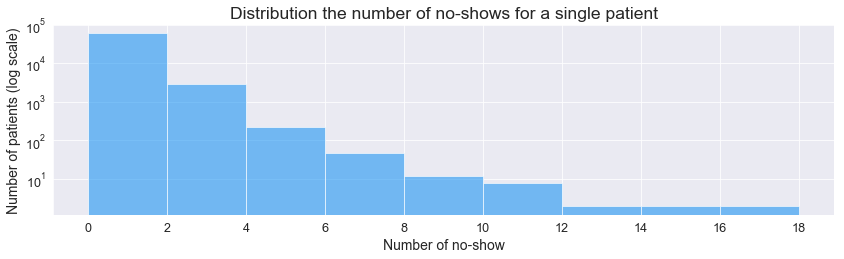

In [22]:
# Plotting the distribution of percentages of no-shows for a single patient
plt.figure(figsize=(size,size/4))
plt.hist(patients_num_no_show, bins=9, color='#2196F3', alpha=.6)
plt.title('Distribution the number of no-shows for a single patient', fontsize=size*1.25)
plt.xlabel('Number of no-show', fontsize=size)
plt.ylabel('Number of patients (log scale)', fontsize=size)
plt.xticks([0,2,4,6,8,10,12,14,16,18], fontsize=size*0.9)
plt.yticks(fontsize=size*0.9)
# Adding a log scale to the y-axis to make the histogram more clear for the smaller values
plt.yscale('log')
plt.show()

From the summary statistics it is clear that there is a big variation between the patients as the maximum number of no-show for a single patient is 18 no-shows. Also the histogram shows that most of the patients don't have more than 2 no-show appointments, but still there are a lot of patients that keep missing more than that.

### 4. Difference between scheduled and appointment dates

In [23]:
# Get the appointments difference between scheduled and appointment dates and adding it to the DataFrame
appointments['SchedulingTime'] = appointments['AppointmentDay'] - appointments['ScheduledDay'].dt.normalize()
# Get the difference in days only
appointments['SchedulingTime'] = appointments['SchedulingTime'].apply(lambda x: x.days)
# Drop the rows with negative schedule time as this is clearly not possible
appointments = appointments[appointments['SchedulingTime']>=0]

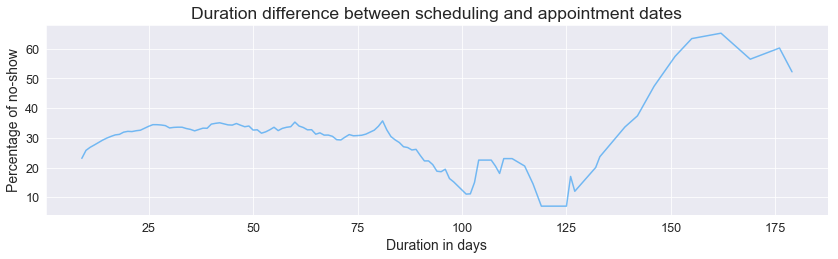

In [24]:
# Grouping the data by SchedulingTime
schedulingtime_num_app = appointments.groupby('SchedulingTime')['No-show'].count()
# Counting the number of no-show appointments for each PatientId
schedulingtime_num_no_show = appointments.groupby('SchedulingTime')['No-show'].sum()
# Calculating the percentage of no-show appointments for each PatientId
schedulingtime_per_no_show = schedulingtime_num_no_show/schedulingtime_num_app


# Plotting the percentage of no-show by the difference between scheduling and appointment dates
# I'm using a moving average with a window size of 10 days to smooth the graph
plt.figure(figsize=(size,size/4))
plt.plot(schedulingtime_per_no_show.rolling(window=10).mean()*100, color='#2196F3', alpha=.6)
plt.ylabel('Percentage of no-show', fontsize=size)
plt.xlabel('Duration in days', fontsize=size)
plt.title('Duration difference between scheduling and appointment dates', fontsize=size*1.25)
plt.xticks(fontsize=size*0.9)
plt.yticks(fontsize=size*0.9)
plt.show()

In [25]:
# Checking the correlation between the variables again
appointments.corr()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,SchedulingTime
PatientId,1.000000,-0.004192,-0.002873,-0.006431,0.001612,0.011016,-0.007855,-0.009735,-0.001477,-0.001442
Age,-0.004192,1.000000,-0.092469,0.504599,0.292398,0.095811,0.078101,0.012629,-0.060320,0.034813
Scholarship,-0.002873,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.008555,0.001182,0.029166,-0.030435
Hipertension,-0.006431,0.504599,-0.019738,1.000000,0.433082,0.087967,0.080162,-0.006285,-0.035662,-0.017236
Diabetes,0.001612,0.292398,-0.024899,0.433082,1.000000,0.018471,0.057578,-0.014561,-0.015158,-0.027200
Alcoholism,0.011016,0.095811,0.035019,0.087967,0.018471,1.000000,0.004668,-0.026154,-0.000181,-0.038527
Handcap,-0.007855,0.078101,-0.008555,0.080162,0.057578,0.004668,1.000000,-0.024097,-0.006290,-0.019774
SMS_received,-0.009735,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.024097,1.000000,0.126502,0.398128
No-show,-0.001477,-0.060320,0.029166,-0.035662,-0.015158,-0.000181,-0.006290,0.126502,1.000000,0.186320
SchedulingTime,-0.001442,0.034813,-0.030435,-0.017236,-0.027200,-0.038527,-0.019774,0.398128,0.186320,1.000000


It is clear from the line plot that the percentage of no-shows increases as the difference between the scheduling and appointment dates increases. So this might be one of the factors affecting the no-shows rate. Also from the new correlation matrix there is a relation between the SchedulingTime and SMS_received columns which might be the reason why the SMS_received was correlated with the No-show, it seems that most of the patients receiving the SMSs have there appointments further away from the scheduled day.

<a id='conclusions'></a>
## Conclusions

### Results:
1. There was no direct correlation between most of the independent variables and the no-show rate.
2. Investigation for the for the gender didn't show any affects either.
3. The highest correlation was with the SMS_received variable and later in the findings it was clear why this correlation might have existed.
3. For the neighbouhoods, most of them are around the mean except for a few outliers that will require further external investigation to understand the reasons of these rates.
4. Looking at the patients there were a few patients that keep missing their appointments with up to 18 missed appointments, further external investigations will be needed to try to tackle any issues that might be causing the no-shows.
5. Exploring the time difference between the scheduling and appointment date, it was clear that the longer the duration the higher the chance of the patient not showing up, also it seems that the SMSs are not that effective as they didn't solve the problem on no-shows.

### Limitations and suggestions:
1. These outcomes are based on my perspective and idea of how the appointments system works. 
2. Further investigation with other methods like machine learning methods would provide further insights that might be hidden, like combinations of different variables that affect the no-show rate.
3. Domain knowledge of how the system works and benchmarking against other areas might further enhance the analysis.
4. Patient surveys to further understand their perspective would be very valuable, especially for the extrems like the patient who missed 18 scheduled appointments.
